In [2]:
import pandas as pd

# Read the XLSX file into a pandas DataFrame
data = pd.read_excel("SmartWay Vehicle List for MY 2023.xlsx")

In [3]:
data.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,AUDI Q4 e-tron,NaN,NaN,Auto-1,2WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,PVGAV00.0NZ4,standard SUV,10,30,36,33,10,Elite
1,AUDI Q4 e-tron,NaN,NaN,Auto-1,2WD,Electricity,CA,ZEV,California ZEV,PVGAV00.0NZ4,standard SUV,10,30,36,33,10,Elite
2,AUDI Q4 e-tron Sportback,NaN,NaN,Auto-1,4WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,PVGAT00.0NZ5,standard SUV,10,100,89,95,10,Elite
3,AUDI Q4 e-tron Sportback,NaN,NaN,Auto-1,4WD,Electricity,CA,ZEV,California ZEV,PVGAT00.0NZ5,standard SUV,10,100,89,95,10,Elite
4,AUDI Q4 e-tron quattro,NaN,NaN,Auto-1,4WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,PVGAT00.0NZ5,standard SUV,10,97,87,93,10,Elite


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 451 non-null    object 
 1   Displ                 167 non-null    float64
 2   Cyl                   167 non-null    float64
 3   Trans                 451 non-null    object 
 4   Drive                 451 non-null    object 
 5   Fuel                  451 non-null    object 
 6   Cert Region           451 non-null    object 
 7   Stnd                  451 non-null    object 
 8   Stnd Description      451 non-null    object 
 9   Underhood ID          451 non-null    object 
 10  Veh Class             451 non-null    object 
 11  Air Pollution Score   451 non-null    int64  
 12  City MPG              451 non-null    object 
 13  Hwy MPG               451 non-null    object 
 14  Cmb MPG               451 non-null    object 
 15  Greenhouse Gas Score  4

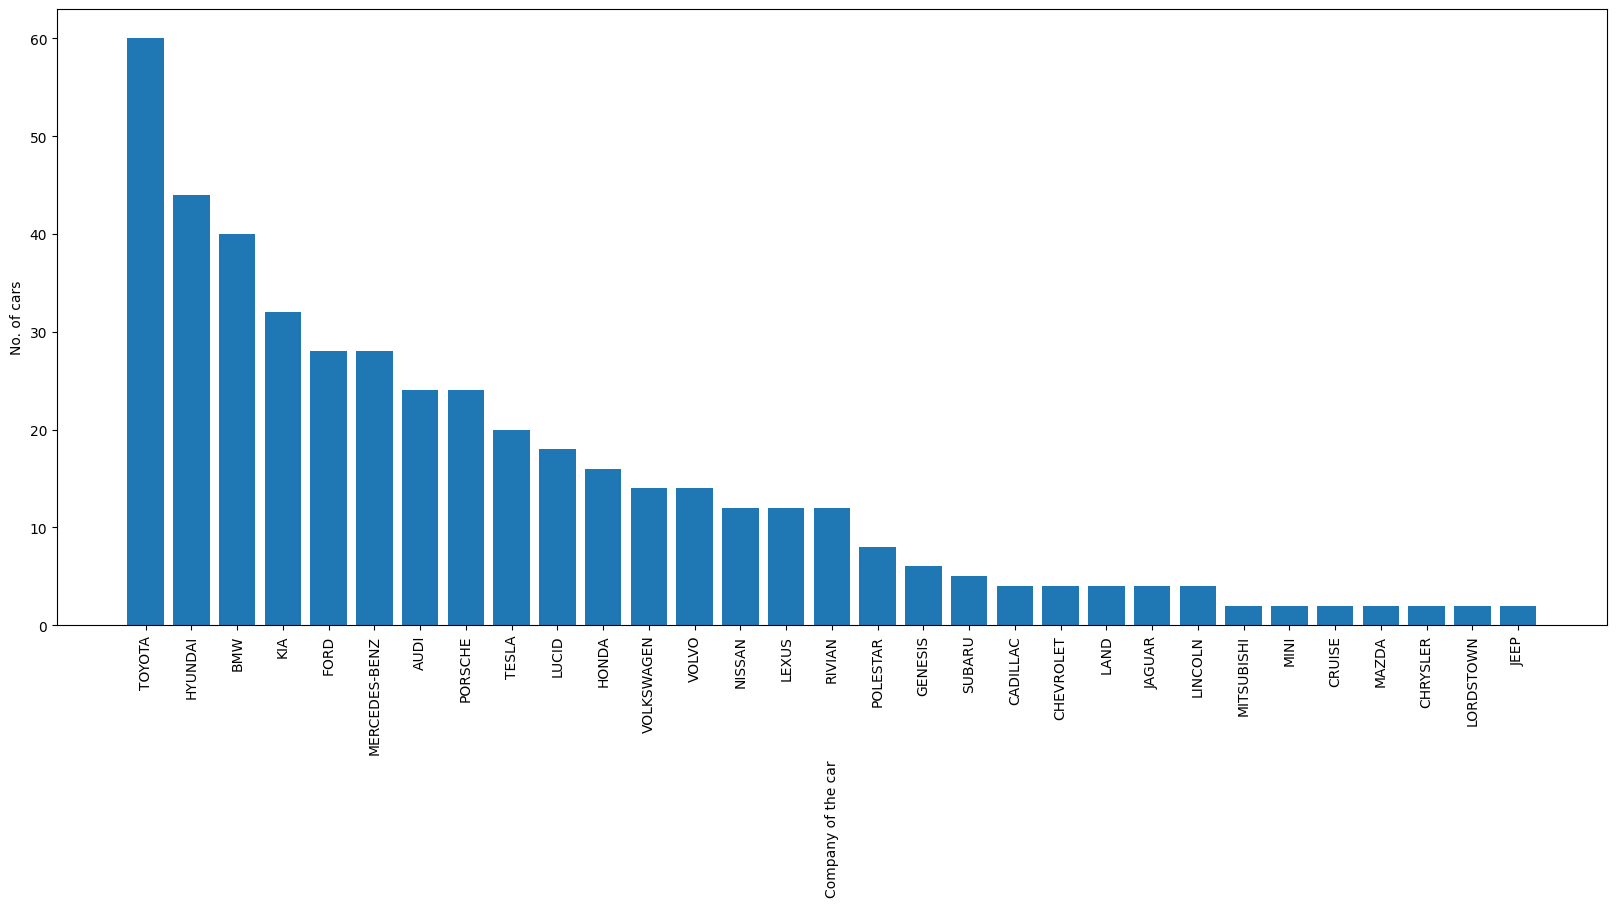

In [13]:
# 1. Lets see the distribution of the model of the car
import matplotlib.pyplot as plt
data['company'] = data['Model'].apply(lambda x: x.split()[0])
plt.figure(figsize=(20,8))
value_count = data['company'].value_counts()
plt.bar(x=value_count.index, height=value_count.values)
plt.xlabel("Company of the car", rotation=90) 
plt.ylabel("No. of cars")
plt.xticks(rotation=90)
plt.show()

In [16]:
# As we can see from the above graphic that toyota, hyundia and BMW's sales are more
data['Displ'].isnull().sum(), data['Cyl'].isnull().sum()

(284, 284)

In [17]:
# these two column contains lots of null values we will drop these two columns from our main dataframe

data.drop(columns=['Displ','Cyl'], inplace=True)

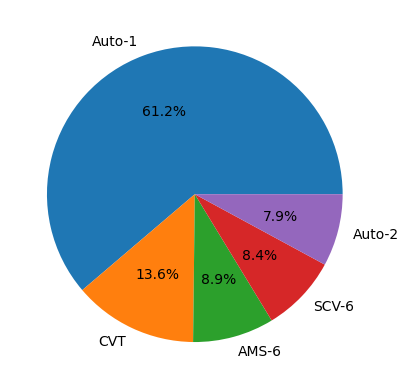

In [22]:
# 2. Lets see the disribution by transmission category and see the top 5 frequent category
data['Trans'].unique()
x = data['Trans'].value_counts().values[:5]
labels = data['Trans'].value_counts().index[:5]


plt.pie(x, labels=labels, autopct="%1.1f%%")
plt.show()

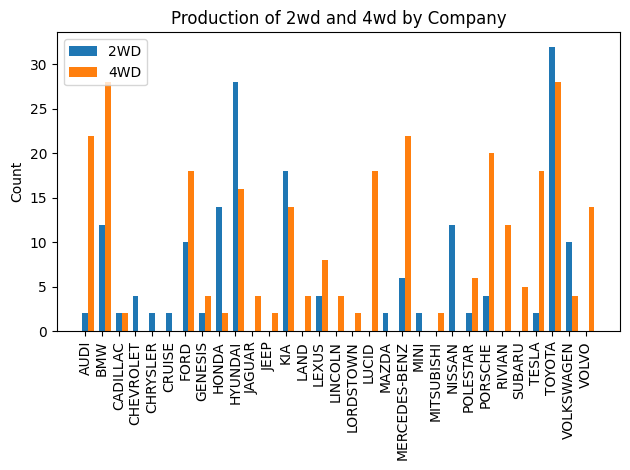

In [34]:
# 3. Lets see which comapny make 2wd and 4ed in which proportion
import matplotlib.pyplot as plt
import numpy as np

# Group the data by company and drive type
grouped_data = data.groupby(['company', 'Drive']).size().unstack()

# Get the unique companies
companies = data['company'].unique()

# Set the bar width
bar_width = 0.35

# Set the x positions of the bars
x = np.arange(len(companies))

# Create a figure and axes
fig, ax = plt.subplots()

# Create a bar chart for each drive type
for i, drive_type in enumerate(grouped_data.columns):
    drive_data = grouped_data[drive_type]
    ax.bar(x + (i * bar_width), drive_data, bar_width, label=drive_type)

# Set the x-axis tick labels to the company names
ax.set_xticks(x)
ax.set_xticklabels(companies, rotation=90)

# Set the y-axis label
ax.set_ylabel('Count')

# Set the chart title
ax.set_title('Production of 2wd and 4wd by Company')

# Add a legend
ax.legend()

# Adjust the layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()


<Figure size 3000x800 with 0 Axes>

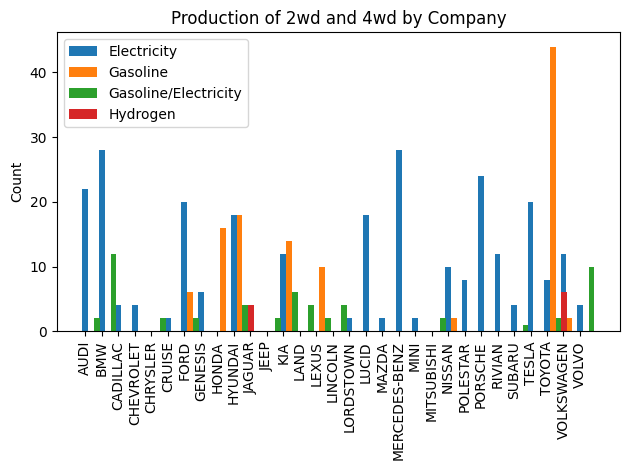

In [38]:
plt.figure(figsize=(30,8))
# Lets see the same with respect to Fuel type
grouped_data = data.groupby(['company', 'Fuel']).size().unstack()

# Get the unique companies
companies = data['company'].unique()

# Set the bar width
bar_width = 0.35

# Set the x positions of the bars
x = np.arange(len(companies))

# Create a figure and axes
fig, ax = plt.subplots()

# Create a bar chart for each drive type
for i, drive_type in enumerate(grouped_data.columns):
    drive_data = grouped_data[drive_type]
    ax.bar(x + (i * bar_width), drive_data, bar_width, label=drive_type)

# Set the x-axis tick labels to the company names
ax.set_xticks(x)
ax.set_xticklabels(companies, rotation=90)

# Set the y-axis label
ax.set_ylabel('Count')

# Set the chart title
ax.set_title('Production of 2wd and 4wd by Company')

# Add a legend
ax.legend()

# Adjust the layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()


<Figure size 3000x800 with 0 Axes>

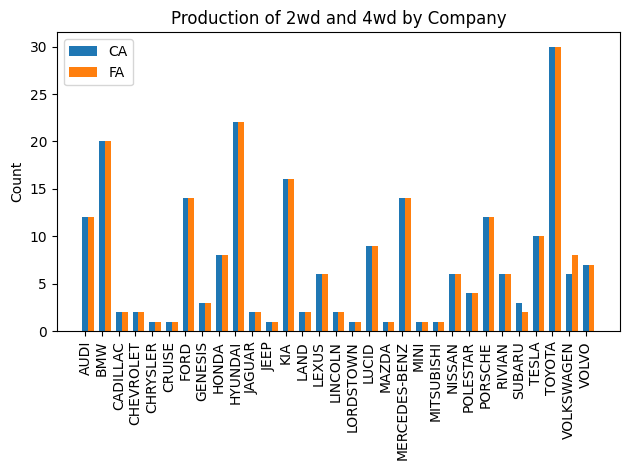

In [40]:
plt.figure(figsize=(30,8))
# Lets see the same with respect to Cert Region
grouped_data = data.groupby(['company', 'Cert Region']).size().unstack()

# Get the unique companies
companies = data['company'].unique()

# Set the bar width
bar_width = 0.35

# Set the x positions of the bars
x = np.arange(len(companies))

# Create a figure and axes
fig, ax = plt.subplots()

# Create a bar chart for each drive type
for i, drive_type in enumerate(grouped_data.columns):
    drive_data = grouped_data[drive_type]
    ax.bar(x + (i * bar_width), drive_data, bar_width, label=drive_type)

# Set the x-axis tick labels to the company names
ax.set_xticks(x)
ax.set_xticklabels(companies, rotation=90)

# Set the y-axis label
ax.set_ylabel('Count')

# Set the chart title
ax.set_title('Production of 2wd and 4wd by Company')

# Add a legend
ax.legend()

# Adjust the layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

<Figure size 3000x800 with 0 Axes>

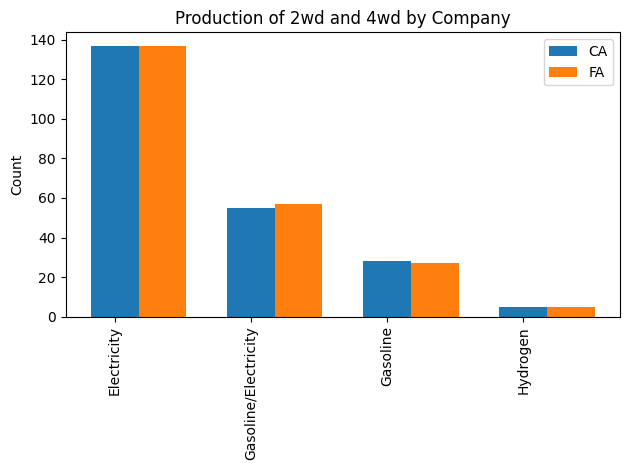

In [41]:
# Lets check in each region's car by fuel type
plt.figure(figsize=(30,8))

grouped_data = data.groupby(['Fuel', 'Cert Region']).size().unstack()

# Get the unique companies
companies = data['Fuel'].unique()

# Set the bar width
bar_width = 0.35

# Set the x positions of the bars
x = np.arange(len(companies))

# Create a figure and axes
fig, ax = plt.subplots()

# Create a bar chart for each drive type
for i, drive_type in enumerate(grouped_data.columns):
    drive_data = grouped_data[drive_type]
    ax.bar(x + (i * bar_width), drive_data, bar_width, label=drive_type)

# Set the x-axis tick labels to the company names
ax.set_xticks(x)
ax.set_xticklabels(companies, rotation=90)

# Set the y-axis label
ax.set_ylabel('Count')

# Set the chart title
ax.set_title('Production of 2wd and 4wd by Company')

# Add a legend
ax.legend()

# Adjust the layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

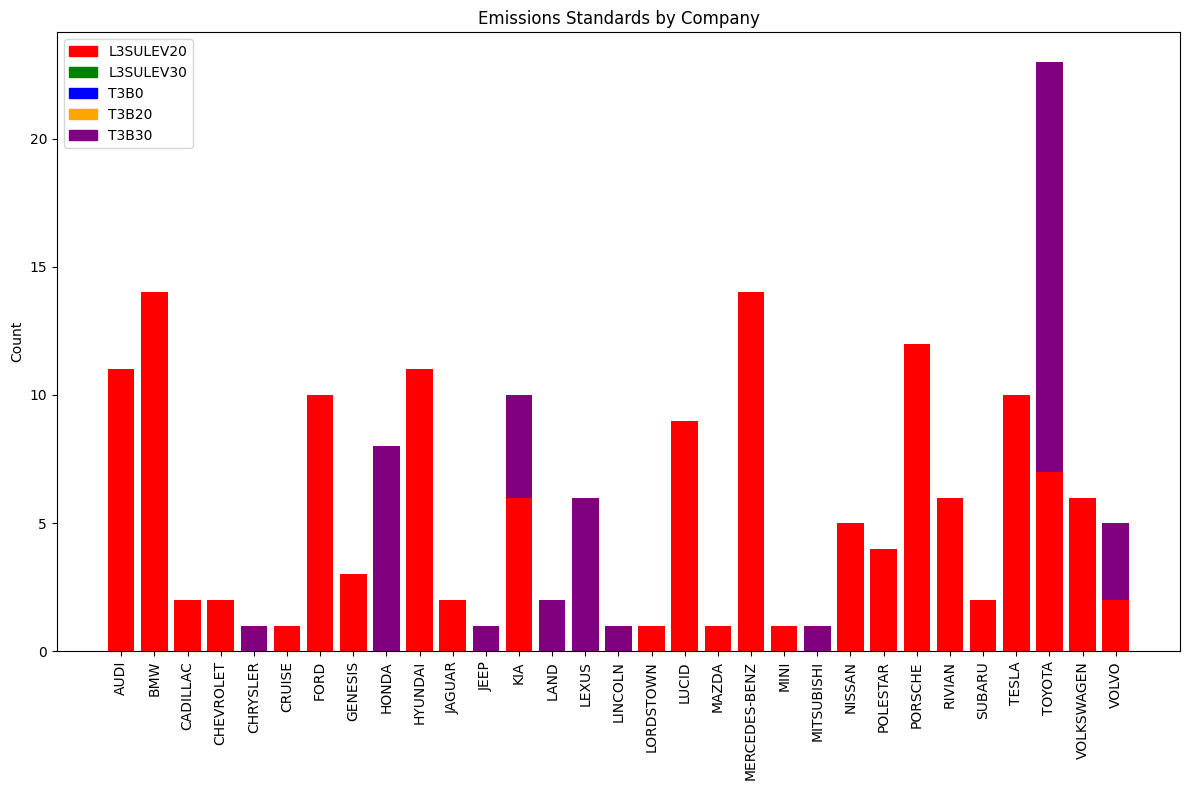

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Group the data by company and emissions standard
grouped_data = data.groupby(['company', 'Stnd']).size().unstack()

# Get the unique companies
companies = data['company'].unique()

# Set the number of emissions standards
num_stnds = len(grouped_data.columns)

# Set the bar width
bar_width = 0.8

# Set the x positions of the bars
x = np.arange(len(companies))

# Define a color scheme for emissions standards
color_scheme = ['red', 'green', 'blue', 'orange', 'purple']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over companies and create a single bar with different colors for emissions standards
for i, company in enumerate(companies):
    company_data = grouped_data.loc[company].values
    ax.bar(x[i], company_data, bar_width, color=color_scheme[:num_stnds])

# Set the x-axis tick labels to the company names
ax.set_xticks(x)
ax.set_xticklabels(companies, rotation=90)

# Set the y-axis label
ax.set_ylabel('Count')

# Set the chart title
ax.set_title('Emissions Standards by Company')

# Create a color legend for emissions standards
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in color_scheme[:num_stnds]]
ax.legend(legend_handles, grouped_data.columns)

# Adjust the layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\naman\AppData\Local\Temp\ipykernel_10824\2320098638.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(companies, rotation=90)


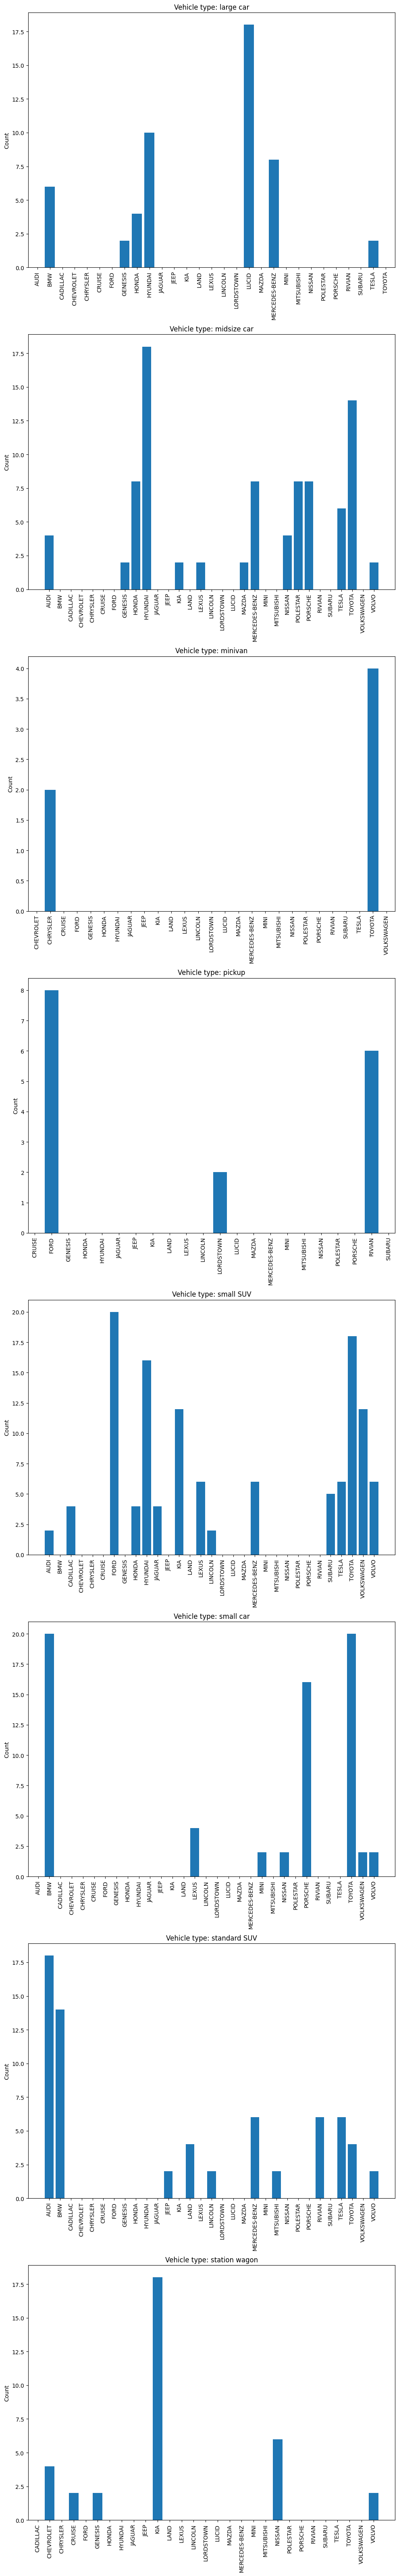

In [54]:
import matplotlib.pyplot as plt

# Group the data by company and emissions standard
grouped_data = data.groupby(['company', 'Veh Class']).size().unstack()

# Get the unique companies
companies = data['company'].unique()

# Set the number of emissions standards
num_stnds = len(grouped_data.columns)

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=num_stnds, ncols=1, figsize=(10, 8*num_stnds))

# Iterate over emissions standards and create separate graphs for each company
for i, stnd in enumerate(grouped_data.columns):
    stnd_data = grouped_data[stnd]
    ax = axes[i]
    ax.bar(companies, stnd_data)
    ax.set_ylabel('Count')
    ax.set_title(f'Vehicle type: {stnd}')
    ax.set_xticklabels(companies, rotation=90)

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


<Figure size 3000x800 with 0 Axes>

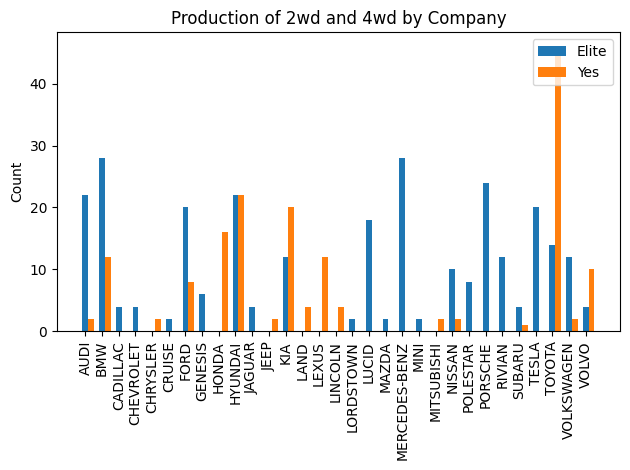

In [56]:
# Lets see the whether the vehicle is smartway or elite company wise
# Lets check in each region's car by fuel type
plt.figure(figsize=(30,8))

grouped_data = data.groupby(['company', 'SmartWay']).size().unstack()

# Get the unique companies
companies = data['company'].unique()

# Set the bar width
bar_width = 0.35

# Set the x positions of the bars
x = np.arange(len(companies))

# Create a figure and axes
fig, ax = plt.subplots()

# Create a bar chart for each drive type
for i, drive_type in enumerate(grouped_data.columns):
    drive_data = grouped_data[drive_type]
    ax.bar(x + (i * bar_width), drive_data, bar_width, label=drive_type)

# Set the x-axis tick labels to the company names
ax.set_xticks(x)
ax.set_xticklabels(companies, rotation=90)

# Set the y-axis label
ax.set_ylabel('Count')

# Set the chart title
ax.set_title('Production of 2wd and 4wd by Company')

# Add a legend
ax.legend()

# Adjust the layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

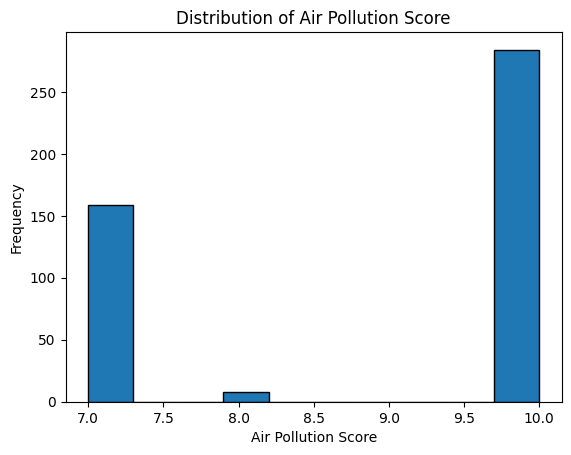

In [59]:
# Lets check the Air Pollution
import matplotlib.pyplot as plt

# Extract the Air Pollution Score column from the DataFrame
air_pollution_score = data['Air Pollution Score']

# Create a histogram
plt.hist(air_pollution_score, bins=10, edgecolor='black')

# Set the x-axis label
plt.xlabel('Air Pollution Score')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the title
plt.title('Distribution of Air Pollution Score')

# Display the plot
plt.show()


C:\Users\naman\AppData\Local\Temp\ipykernel_10824\1844918050.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(companies, rotation=90)


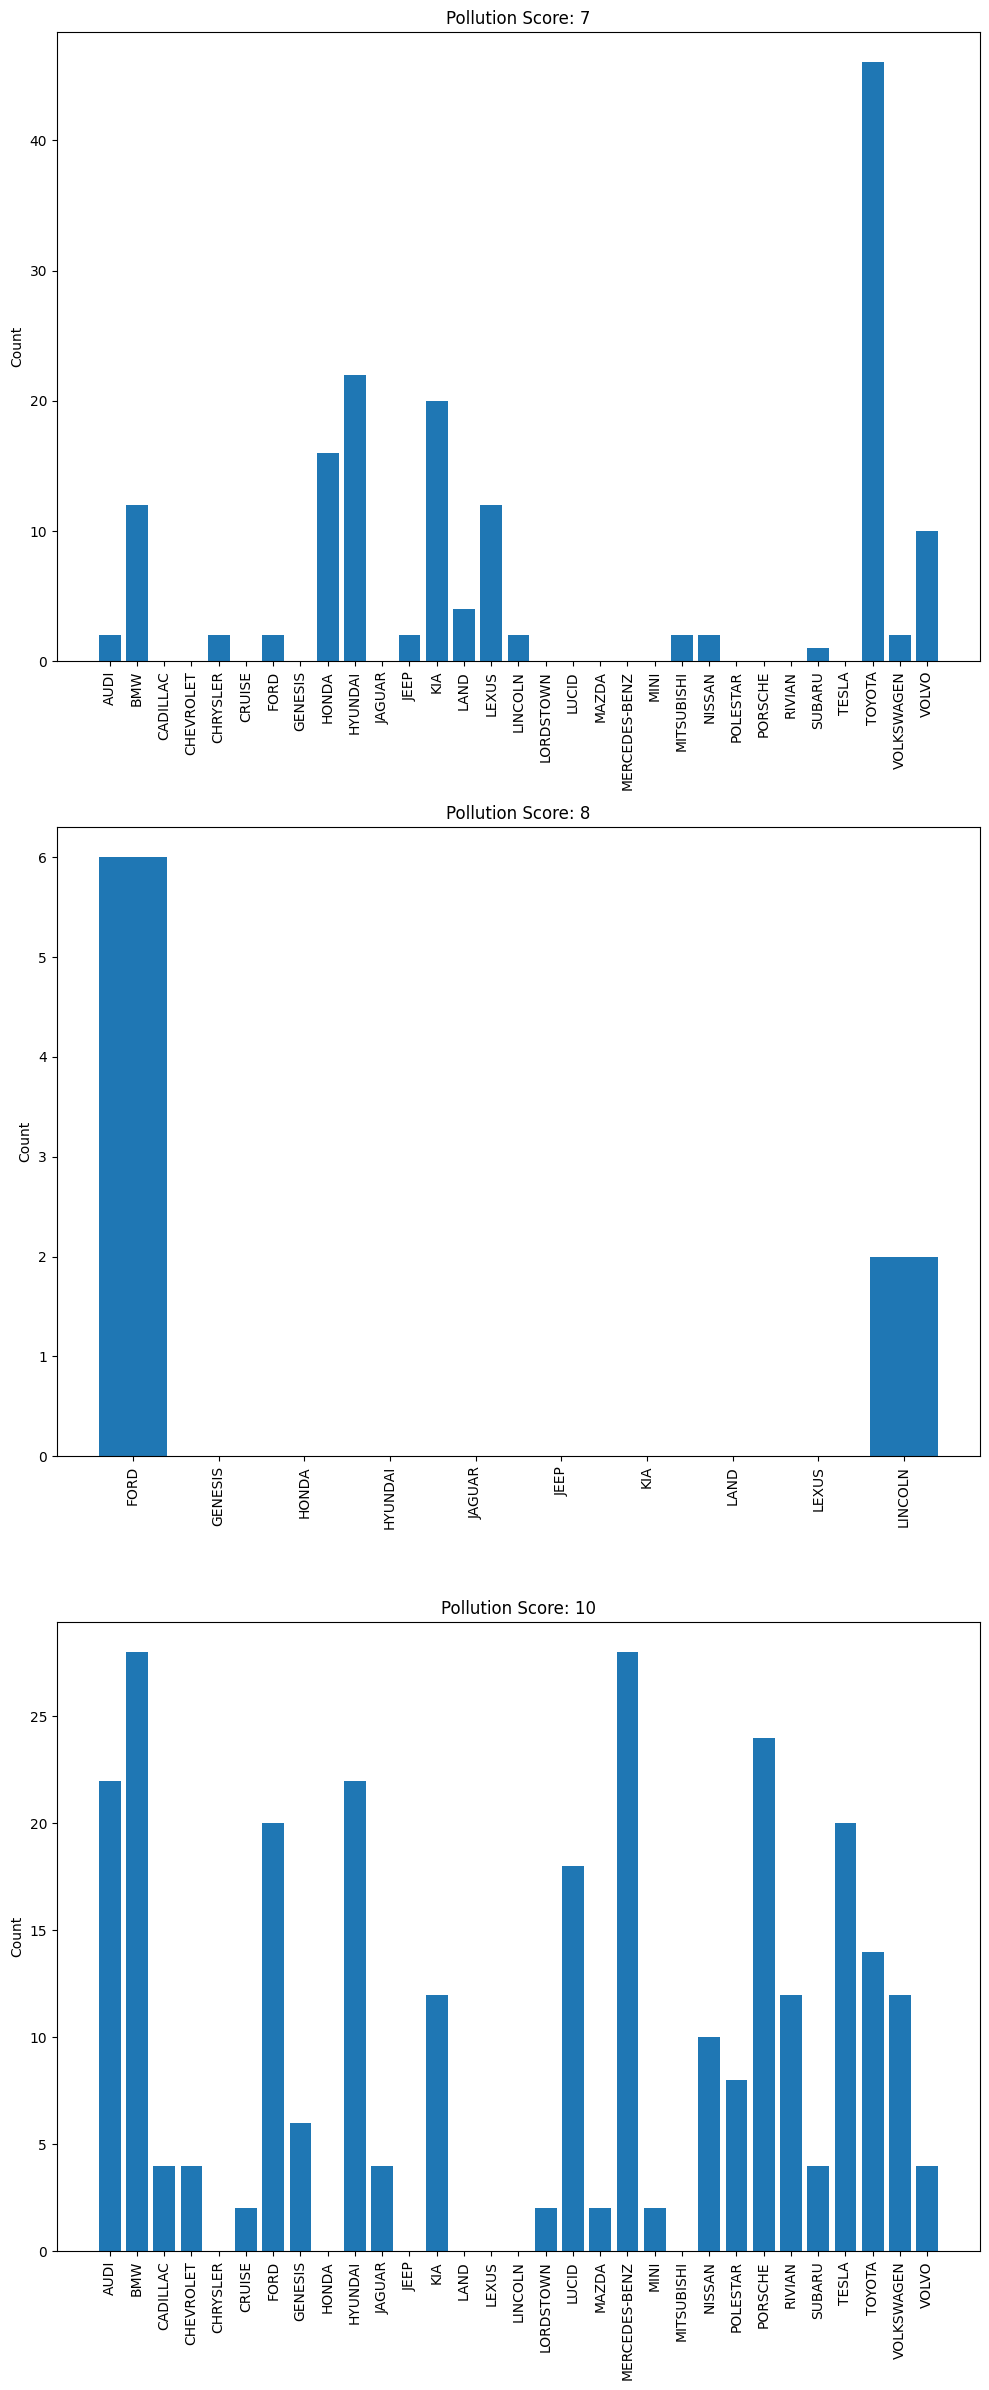

In [63]:
import matplotlib.pyplot as plt

# Group the data by company and emissions standard
grouped_data = data.groupby(['company', 'Air Pollution Score']).size().unstack()

# Get the unique companies
companies = data['company'].unique()

# Set the number of emissions standards
num_stnds = len(grouped_data.columns)

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=num_stnds, ncols=1, figsize=(10, 8*num_stnds))

# Iterate over emissions standards and create separate graphs for each company
for i, stnd in enumerate(grouped_data.columns):
    stnd_data = grouped_data[stnd]
    ax = axes[i]
    ax.bar(companies, stnd_data)
    ax.set_ylabel('Count')
    ax.set_title(f'Pollution Score: {stnd}')
    ax.set_xticklabels(companies, rotation=90)

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


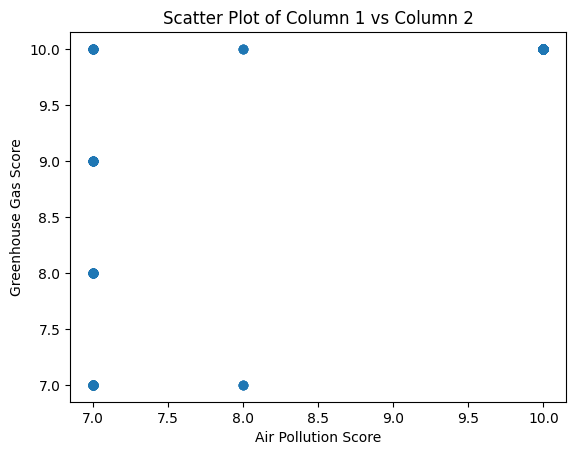

In [64]:
import matplotlib.pyplot as plt

# Extract the two columns from the DataFrame
column1 = data['Air Pollution Score']
column2 = data['Greenhouse Gas Score']

# Create a scatter plot
plt.scatter(column1, column2)

# Set the x-axis label
plt.xlabel('Air Pollution Score')

# Set the y-axis label
plt.ylabel('Greenhouse Gas Score')

# Set the title
plt.title('Scatter Plot of Column 1 vs Column 2')

# Display the plot
plt.show()


C:\Users\naman\AppData\Local\Temp\ipykernel_10824\4030651330.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['City MPG'] = company_data['City MPG'].apply(lambda x: x.split("/")[1] if '/' in x else x)


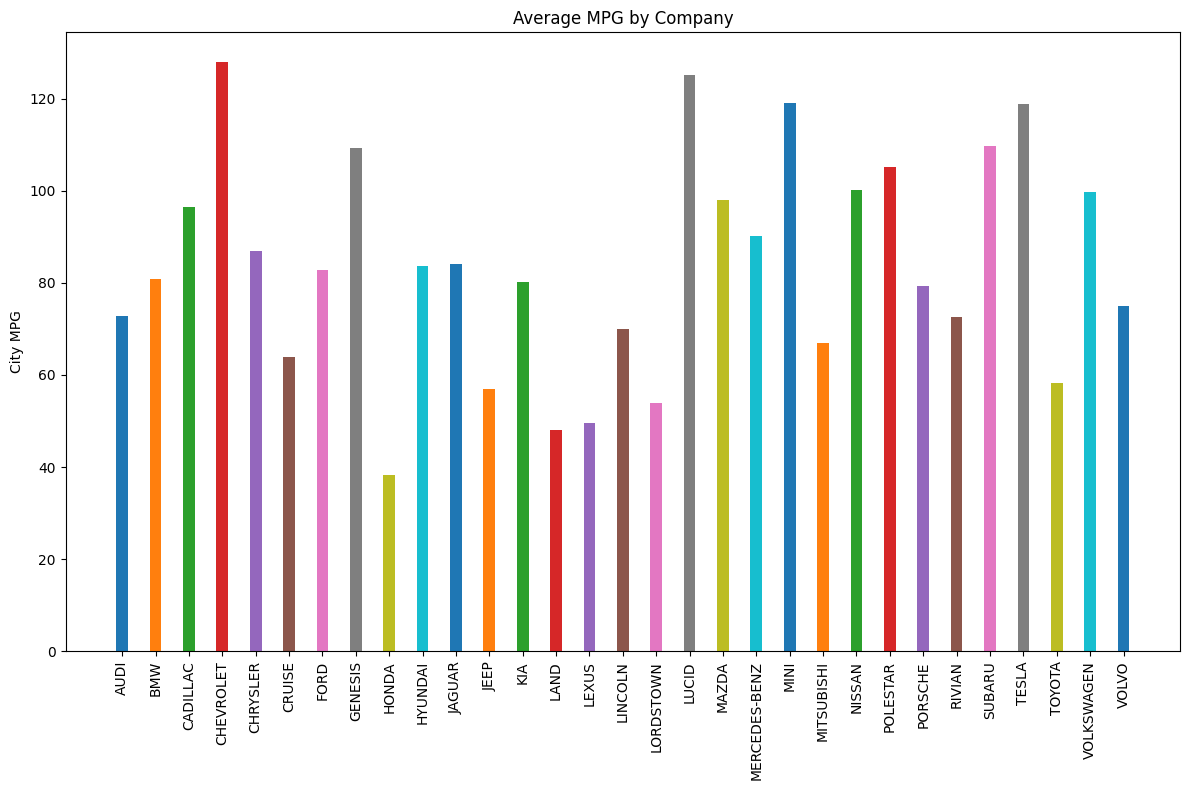

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Group the data by company
grouped_data = data.groupby('company')

# Get the unique companies
companies = data['company'].unique()

# Set the number of companies
num_companies = len(companies)

# Set the bar width
bar_width = 0.35

# Set the x positions of the bars
x = np.arange(num_companies)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over companies and create bar plots for MPG
for i, company in enumerate(companies):
    company_data = grouped_data.get_group(company)
    company_data['City MPG'] = company_data['City MPG'].apply(lambda x: x.split("/")[1] if '/' in x else x)
    mpg_values = company_data['City MPG'].astype(int)
    ax.bar(x[i], mpg_values.mean(), bar_width, label=company)

# Set the x-axis tick labels to the company names
ax.set_xticks(x)
ax.set_xticklabels(companies, rotation=90)

# Set the y-axis label
ax.set_ylabel('City MPG')

# Set the chart title
ax.set_title('Average MPG by Company')



# Adjust the layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\naman\AppData\Local\Temp\ipykernel_10824\3219616430.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Hwy MPG'] = company_data['Hwy MPG'].apply(lambda x: x.split("/")[1] if '/' in x else x)


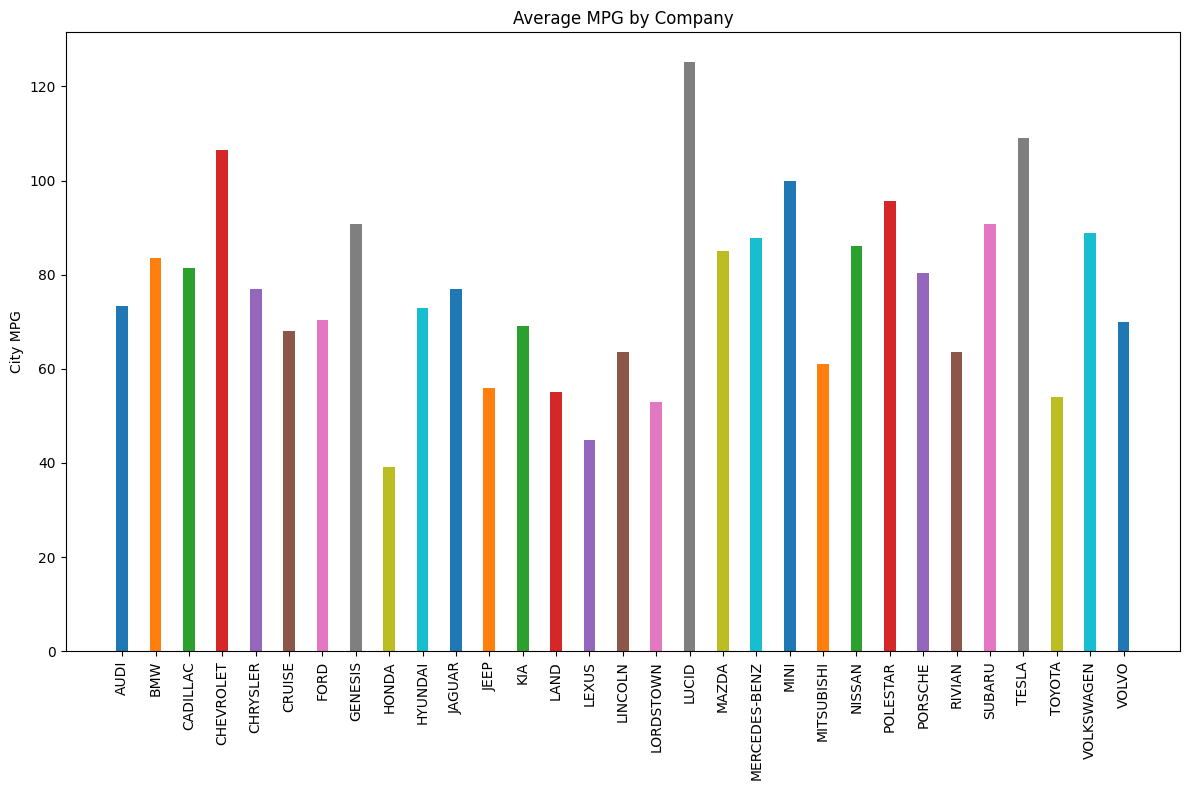

In [72]:
# Lets do the same for Hwy MPG and Cmb MPG
import matplotlib.pyplot as plt
import numpy as np

# Group the data by company
grouped_data = data.groupby('company')

# Get the unique companies
companies = data['company'].unique()

# Set the number of companies
num_companies = len(companies)

# Set the bar width
bar_width = 0.35

# Set the x positions of the bars
x = np.arange(num_companies)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over companies and create bar plots for MPG
for i, company in enumerate(companies):
    company_data = grouped_data.get_group(company)
    company_data['Hwy MPG'] = company_data['Hwy MPG'].apply(lambda x: x.split("/")[1] if '/' in x else x)
    mpg_values = company_data['Hwy MPG'].astype(int)
    ax.bar(x[i], mpg_values.mean(), bar_width, label=company)

# Set the x-axis tick labels to the company names
ax.set_xticks(x)
ax.set_xticklabels(companies, rotation=90)

# Set the y-axis label
ax.set_ylabel('City MPG')

# Set the chart title
ax.set_title('Average MPG by Company')



# Adjust the layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\naman\AppData\Local\Temp\ipykernel_10824\798822240.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Cmb MPG'] = company_data['Cmb MPG'].apply(lambda x: x.split("/")[1] if '/' in x else x)


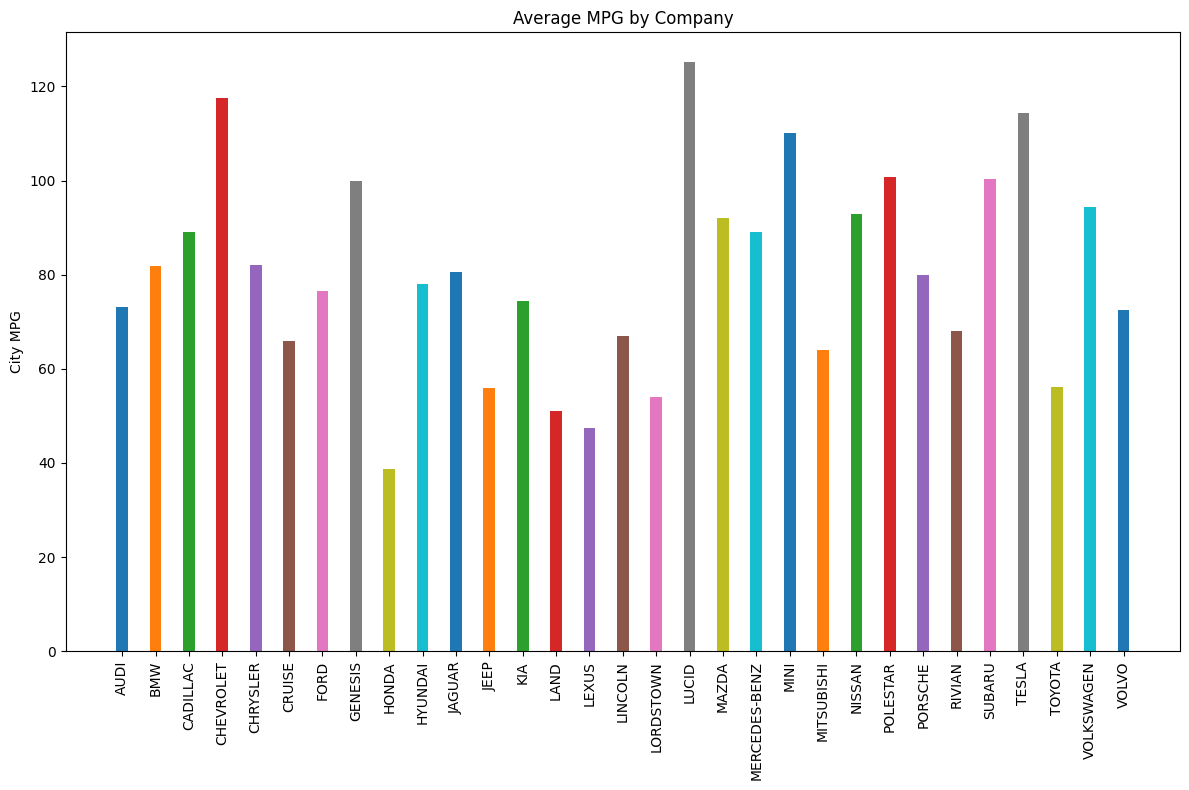

In [73]:
# Lets do the same for Hwy MPG and Cmb MPG
import matplotlib.pyplot as plt
import numpy as np

# Group the data by company
grouped_data = data.groupby('company')

# Get the unique companies
companies = data['company'].unique()

# Set the number of companies
num_companies = len(companies)

# Set the bar width
bar_width = 0.35

# Set the x positions of the bars
x = np.arange(num_companies)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over companies and create bar plots for MPG
for i, company in enumerate(companies):
    company_data = grouped_data.get_group(company)
    company_data['Cmb MPG'] = company_data['Cmb MPG'].apply(lambda x: x.split("/")[1] if '/' in x else x)
    mpg_values = company_data['Cmb MPG'].astype(int)
    ax.bar(x[i], mpg_values.mean(), bar_width, label=company)

# Set the x-axis tick labels to the company names
ax.set_xticks(x)
ax.set_xticklabels(companies, rotation=90)

# Set the y-axis label
ax.set_ylabel('City MPG')

# Set the chart title
ax.set_title('Average MPG by Company')



# Adjust the layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()
